## Visulization of LLM RDMs

In [1]:
! source /scratch/qy775/nma/nmaenv/bin/activate

In [2]:
import os
import pickle
import nibabel as nib
from tqdm import tqdm
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import squareform
from statsmodels.stats.multitest import fdrcorrection

In [3]:
def visualize_RDMs(rdms, metadata_labels, plot_labels, plot_dir):
    assert(len(rdms) == len(metadata_labels))
    num_rdms = len(rdms)

    # If only one RDM, axes won't be an array, so we make it iterable
    if num_rdms == 1:
        axes = [axes]

    for i, (rdm, metadata_label) in enumerate(zip(rdms, metadata_labels)):
        # Create a new figure for each RDM
        fig, ax = plt.subplots(figsize=(5, 5))

        # Get lower triangular values, rank normalize, and convert to square form
        rdm_rank = stats.rankdata(get_lowertriangular(rdm))
        rdm_rank_norm = rdm_rank / rdm_rank.max()
        rdm_rank_square = squareform(rdm_rank_norm)

        # Plot the RDM
        im = ax.imshow(rdm_rank_square, cmap='jet')
        ax.set_title(f"{plot_labels[i]} rank normalized RDM")
        fig.colorbar(im, ax=ax)

        # Save each RDM as an individual file
        save_path = f"{plot_dir}/{metadata_label}_RDM.png"
        plt.savefig(save_path)
        
        plt.tight_layout()
        plt.show()
    
def get_lowertriangular(rdm):
    num_conditions = rdm.shape[0]
    return rdm[np.triu_indices(num_conditions,1)]

In [12]:
# Setup path
task='test'
radius = 4
dataset_root = "/scratch/qy775/nma/BOLDMomentsDataset"
save_root = f'/scratch/qy775/nma/LLM_RDMs/'
searchlight_root=os.path.join(dataset_root, "derivatives", "versionB", "MNI152","prepared_searchlight_pkl")

# Define the path for the new directory
plot_dir = os.path.join(save_root, "plots")

# Create the directory, including any intermediate directories
os.makedirs(save_root, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# Load Group Brain Mask
mask_root = os.path.join(dataset_root,'derivatives/versionB/MNI152/GLM/mask')

# metadata RDM path
#metadata_rdm_root = os.path.join(dataset_root,"derivatives","versionA","analysis","metadataRSA","rdms")

# LLM RDM root
llm_rdm_root = os.path.join("/scratch/qy775/nma/LLM_RDMs/")

# load prepared searchlight RDMs
subjects = ['01','02','03','04','05','06','07','08','09','10']
#mlabels=["actions"] #["actions", "scenes", "objects", "ActionsObjectsScenes", "text_descriptions", 'GIT_image_caption']

llmlabels=["rdm_codellama_last","rdm_codellama","rdm_llama_last","rdm_llama","RDM_CogVLM2_last","RDM_CogVLM2_mid"]
llm_plot_labels=["codellama last layer","codellama middle layer","llama last layer","llama middle layer","cogvlm last layer","cogvlm middle layer"]
llm_rdms = []

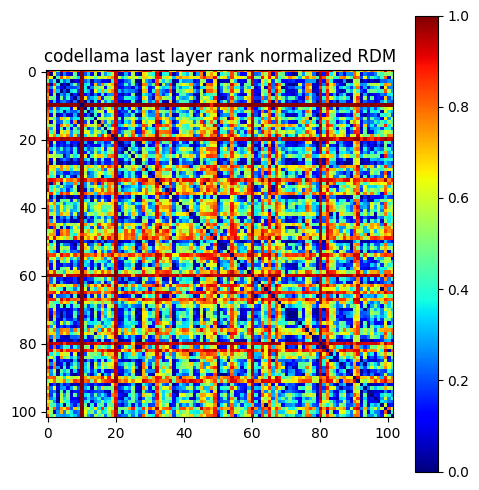

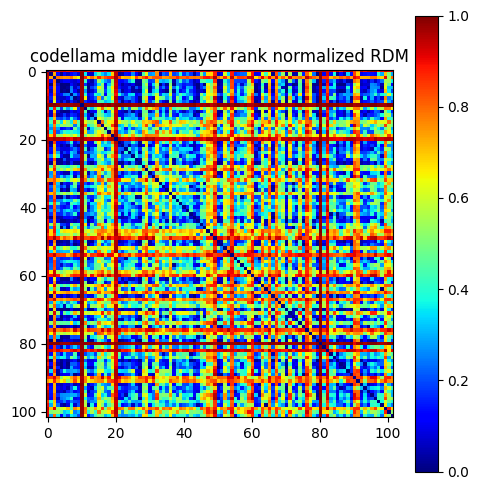

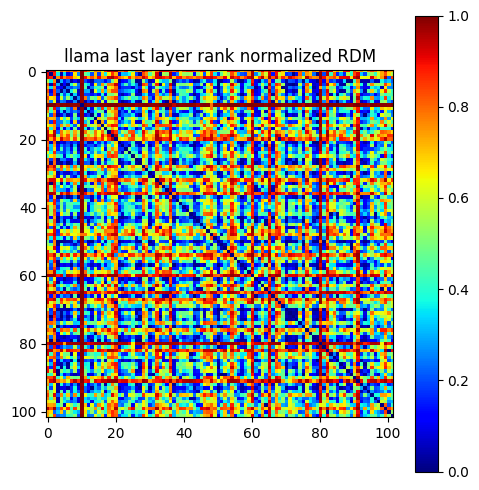

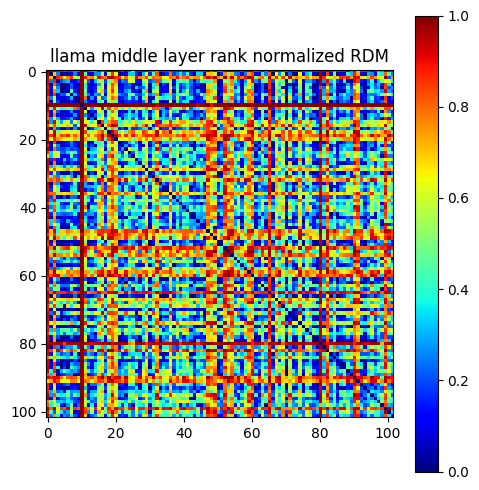

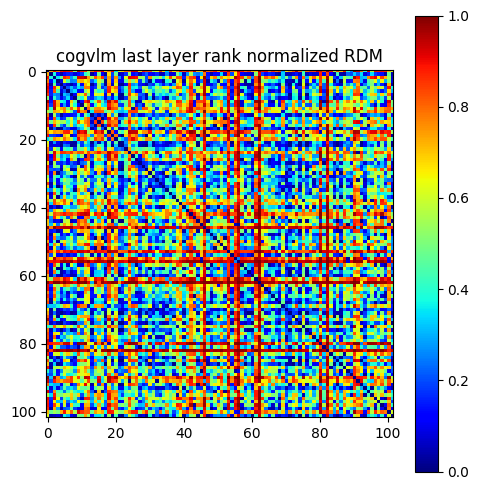

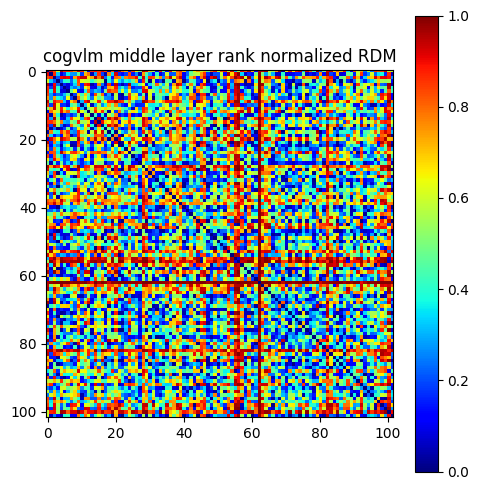

In [13]:
llm_rdms = []
for model_label in llmlabels: 
    # load model RDM
    llm=np.load(os.path.join(llm_rdm_root + model_label + ".npy"))
    llm_rdms.append(llm)
    
visualize_RDMs(llm_rdms, llmlabels, llm_plot_labels,plot_dir)

In [6]:
llm_rdms[0]-llm_rdms[2]

array([[ 0.00000000e+00, -1.96534160e-02, -2.65010053e-02, ...,
        -2.18420454e-02, -1.76218653e-02, -1.37602224e-02],
       [-1.96534160e-02, -2.22044605e-16, -2.51986012e-02, ...,
        -2.39060522e-02, -1.85445165e-02, -1.61002098e-02],
       [-2.65010053e-02, -2.51986012e-02,  0.00000000e+00, ...,
        -3.08069737e-02, -1.46829641e-02, -2.43280351e-02],
       ...,
       [-2.18420454e-02, -2.39060522e-02, -3.08069737e-02, ...,
         0.00000000e+00, -1.89470537e-02, -1.90517826e-02],
       [-1.76218653e-02, -1.85445165e-02, -1.46829641e-02, ...,
        -1.89470537e-02,  0.00000000e+00, -1.57856489e-02],
       [-1.37602224e-02, -1.61002098e-02, -2.43280351e-02, ...,
        -1.90517826e-02, -1.57856489e-02,  0.00000000e+00]])

In [7]:
llm_rdms[1]-llm_rdms[3]

array([[-1.11022302e-16, -7.08210011e-03, -6.95146241e-03, ...,
        -8.19251989e-03, -6.48149799e-03, -6.82284130e-03],
       [-7.08210011e-03,  0.00000000e+00, -5.40070327e-03, ...,
        -6.43434672e-03, -4.27545183e-03, -3.72380711e-03],
       [-6.95146241e-03, -5.40070327e-03,  0.00000000e+00, ...,
        -9.01862792e-03, -3.06585739e-03, -5.58134199e-03],
       ...,
       [-8.19251989e-03, -6.43434672e-03, -9.01862792e-03, ...,
         0.00000000e+00, -8.84773654e-03, -6.66872039e-03],
       [-6.48149799e-03, -4.27545183e-03, -3.06585739e-03, ...,
        -8.84773654e-03, -1.11022302e-16, -3.72056473e-03],
       [-6.82284130e-03, -3.72380711e-03, -5.58134199e-03, ...,
        -6.66872039e-03, -3.72056473e-03,  0.00000000e+00]])

In [9]:
llm_rdms[0]

array([[0.        , 0.02971722, 0.02496006, ..., 0.03300343, 0.02345579,
        0.02725479],
       [0.02971722, 0.        , 0.02243438, ..., 0.0204722 , 0.02075505,
        0.01970409],
       [0.02496006, 0.02243438, 0.        , ..., 0.02648988, 0.01278235,
        0.02117937],
       ...,
       [0.03300343, 0.0204722 , 0.02648988, ..., 0.        , 0.02642415,
        0.0220707 ],
       [0.02345579, 0.02075505, 0.01278235, ..., 0.02642415, 0.        ,
        0.0191463 ],
       [0.02725479, 0.01970409, 0.02117937, ..., 0.0220707 , 0.0191463 ,
        0.        ]])

In [11]:
llm_rdms[1]

array([[0.        , 0.00403798, 0.00381779, ..., 0.00374308, 0.00346989,
        0.00363683],
       [0.00403798, 0.        , 0.00252988, ..., 0.00246125, 0.00197971,
        0.00160626],
       [0.00381779, 0.00252988, 0.        , ..., 0.00349645, 0.00207562,
        0.0027555 ],
       ...,
       [0.00374308, 0.00246125, 0.00349645, ..., 0.        , 0.00321   ,
        0.00239659],
       [0.00346989, 0.00197971, 0.00207562, ..., 0.00321   , 0.        ,
        0.00203633],
       [0.00363683, 0.00160626, 0.0027555 , ..., 0.00239659, 0.00203633,
        0.        ]])

In [10]:
llm_rdms[2]

array([[0.00000000e+00, 4.93706381e-02, 5.14610642e-02, ...,
        5.48454794e-02, 4.10776530e-02, 4.10150118e-02],
       [4.93706381e-02, 2.22044605e-16, 4.76329822e-02, ...,
        4.43782516e-02, 3.92995651e-02, 3.58043029e-02],
       [5.14610642e-02, 4.76329822e-02, 0.00000000e+00, ...,
        5.72968541e-02, 2.74653159e-02, 4.55074036e-02],
       ...,
       [5.48454794e-02, 4.43782516e-02, 5.72968541e-02, ...,
        0.00000000e+00, 4.53712012e-02, 4.11224822e-02],
       [4.10776530e-02, 3.92995651e-02, 2.74653159e-02, ...,
        4.53712012e-02, 0.00000000e+00, 3.49319522e-02],
       [4.10150118e-02, 3.58043029e-02, 4.55074036e-02, ...,
        4.11224822e-02, 3.49319522e-02, 0.00000000e+00]])

In [8]:
llm_rdms[3]

array([[1.11022302e-16, 1.11200806e-02, 1.07692488e-02, ...,
        1.19355958e-02, 9.95139068e-03, 1.04596738e-02],
       [1.11200806e-02, 0.00000000e+00, 7.93058447e-03, ...,
        8.89559561e-03, 6.25515834e-03, 5.33006345e-03],
       [1.07692488e-02, 7.93058447e-03, 0.00000000e+00, ...,
        1.25150738e-02, 5.14148134e-03, 8.33684279e-03],
       ...,
       [1.19355958e-02, 8.89559561e-03, 1.25150738e-02, ...,
        0.00000000e+00, 1.20577354e-02, 9.06530635e-03],
       [9.95139068e-03, 6.25515834e-03, 5.14148134e-03, ...,
        1.20577354e-02, 1.11022302e-16, 5.75689661e-03],
       [1.04596738e-02, 5.33006345e-03, 8.33684279e-03, ...,
        9.06530635e-03, 5.75689661e-03, 0.00000000e+00]])

In [14]:
llm_rdms[4]

array([[0.00000000e+00, 3.51868534e-01, 3.87809072e-01, ...,
        3.79029276e-01, 3.51352766e-01, 3.38137629e-01],
       [3.51868534e-01, 1.11022302e-16, 3.10527267e-01, ...,
        2.17641120e-01, 3.21209792e-01, 2.32362631e-01],
       [3.87809072e-01, 3.10527267e-01, 0.00000000e+00, ...,
        3.51527638e-01, 3.28521484e-01, 2.41604630e-01],
       ...,
       [3.79029276e-01, 2.17641120e-01, 3.51527638e-01, ...,
        1.11022302e-16, 3.60367054e-01, 2.53967221e-01],
       [3.51352766e-01, 3.21209792e-01, 3.28521484e-01, ...,
        3.60367054e-01, 0.00000000e+00, 3.37190888e-01],
       [3.38137629e-01, 2.32362631e-01, 2.41604630e-01, ...,
        2.53967221e-01, 3.37190888e-01, 0.00000000e+00]])

In [15]:
llm_rdms[5]

array([[1.11022302e-16, 1.42718943e-01, 1.33545320e-01, ...,
        1.47387131e-01, 1.19404301e-01, 1.20359368e-01],
       [1.42718943e-01, 0.00000000e+00, 1.37423175e-01, ...,
        9.58695072e-02, 1.37840743e-01, 8.34691911e-02],
       [1.33545320e-01, 1.37423175e-01, 0.00000000e+00, ...,
        1.45305899e-01, 1.40790865e-01, 1.02708889e-01],
       ...,
       [1.47387131e-01, 9.58695072e-02, 1.45305899e-01, ...,
        0.00000000e+00, 1.65710742e-01, 1.04022192e-01],
       [1.19404301e-01, 1.37840743e-01, 1.40790865e-01, ...,
        1.65710742e-01, 0.00000000e+00, 1.42376610e-01],
       [1.20359368e-01, 8.34691911e-02, 1.02708889e-01, ...,
        1.04022192e-01, 1.42376610e-01, 0.00000000e+00]])